In [1]:
!pip install pycocotools matplotlib opencv-python seaborn



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2
from pycocotools.coco import COCO


In [3]:
# Update these paths based on your local setup
ANNOTATION_FILE = r"C:\infosys internship\coco2017_subset\annotation_subset\instances_train2017_subset.json"
IMAGE_FOLDER = r"C:\infosys internship\coco2017_subset\train2017"


In [4]:
# Load annotations
coco = COCO(ANNOTATION_FILE)

# Load data directly from the JSON file for additional checks
with open(ANNOTATION_FILE, 'r') as f:
    data = json.load(f)


loading annotations into memory...
Done (t=3.95s)
creating index...
index created!


In [5]:
# Check for missing fields in images and annotations
missing_images = sum(1 for img in data['images'] if 'file_name' not in img)
missing_annotations = sum(1 for ann in data['annotations'] if 'bbox' not in ann)

print(f"Missing Images: {missing_images}")
print(f"Missing Annotations: {missing_annotations}")


Missing Images: 0
Missing Annotations: 0


In [6]:
# Get category names
category_ids = coco.getCatIds()
categories = coco.loadCats(category_ids)
category_names = [category['name'] for category in categories]

print(f"Total Categories: {len(category_names)}")
print(f"Categories: {category_names}")


Total Categories: 80
Categories: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


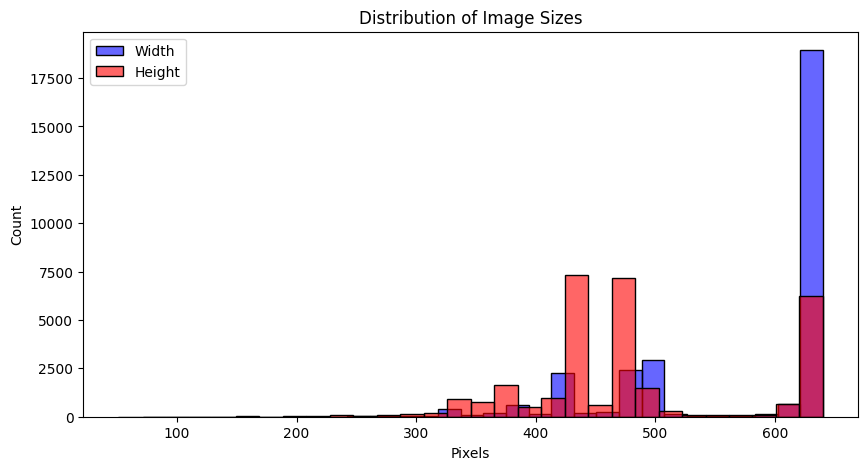

In [7]:
# Extract image sizes
image_sizes = [(img['width'], img['height']) for img in data['images']]
widths, heights = zip(*image_sizes)

# Plot image size distribution
plt.figure(figsize=(10, 5))
sns.histplot(widths, bins=30, color='blue', label='Width', alpha=0.6)
sns.histplot(heights, bins=30, color='red', label='Height', alpha=0.6)
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.title("Distribution of Image Sizes")
plt.legend()
plt.show()


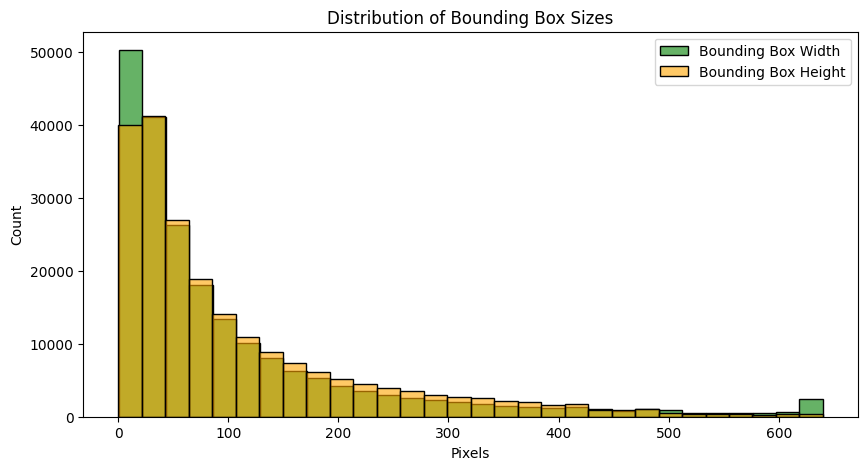

In [8]:
# Extract bounding box sizes
bbox_sizes = [(ann['bbox'][2], ann['bbox'][3]) for ann in data['annotations']]
bbox_widths, bbox_heights = zip(*bbox_sizes)

# Plot bounding box size distribution
plt.figure(figsize=(10, 5))
sns.histplot(bbox_widths, bins=30, color='green', label='Bounding Box Width', alpha=0.6)
sns.histplot(bbox_heights, bins=30, color='orange', label='Bounding Box Height', alpha=0.6)
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.title("Distribution of Bounding Box Sizes")
plt.legend()
plt.show()


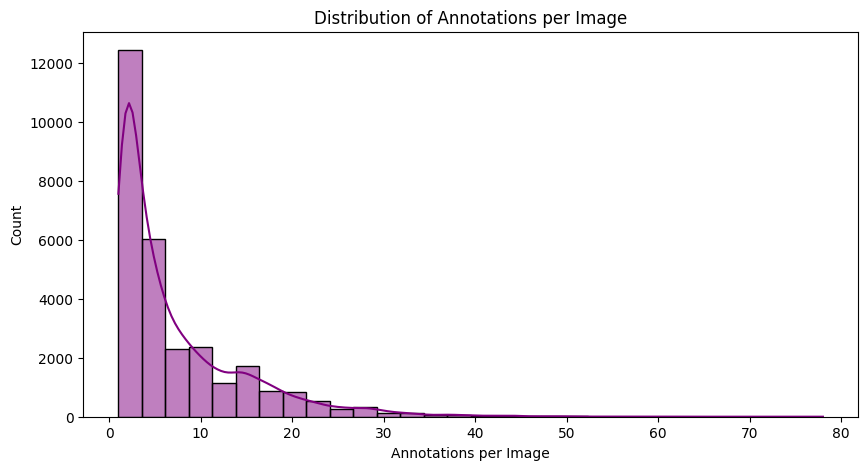

In [9]:
# Count annotations per image
annotations_per_image = {}
for ann in data['annotations']:
    img_id = ann['image_id']
    annotations_per_image[img_id] = annotations_per_image.get(img_id, 0) + 1

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(list(annotations_per_image.values()), bins=30, color='purple', kde=True)
plt.xlabel("Annotations per Image")
plt.ylabel("Count")
plt.title("Distribution of Annotations per Image")
plt.show()


C:\Users\jerin\AppData\Local\Temp\ipykernel_16376\1624918482.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts_named.keys()), y=list(category_counts_named.values()), palette="coolwarm")


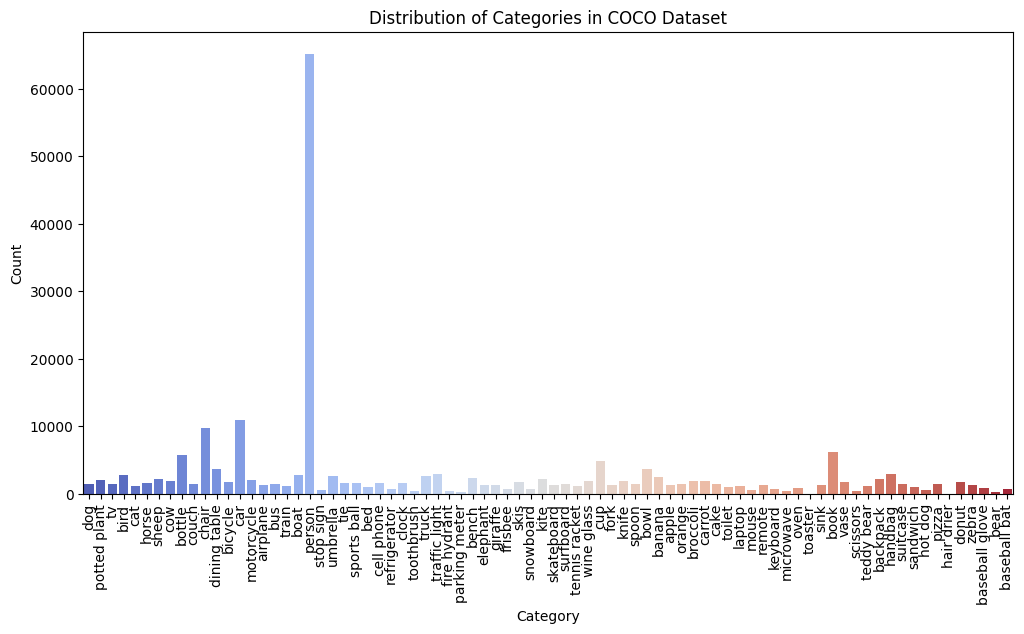

In [10]:
# Count occurrences of each category
category_counts = {}
for ann in data['annotations']:
    category_id = ann['category_id']
    category_counts[category_id] = category_counts.get(category_id, 0) + 1

# Convert category IDs to names
category_names_dict = {cat['id']: cat['name'] for cat in categories}
category_counts_named = {category_names_dict[k]: v for k, v in category_counts.items()}

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(category_counts_named.keys()), y=list(category_counts_named.values()), palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories in COCO Dataset")
plt.show()


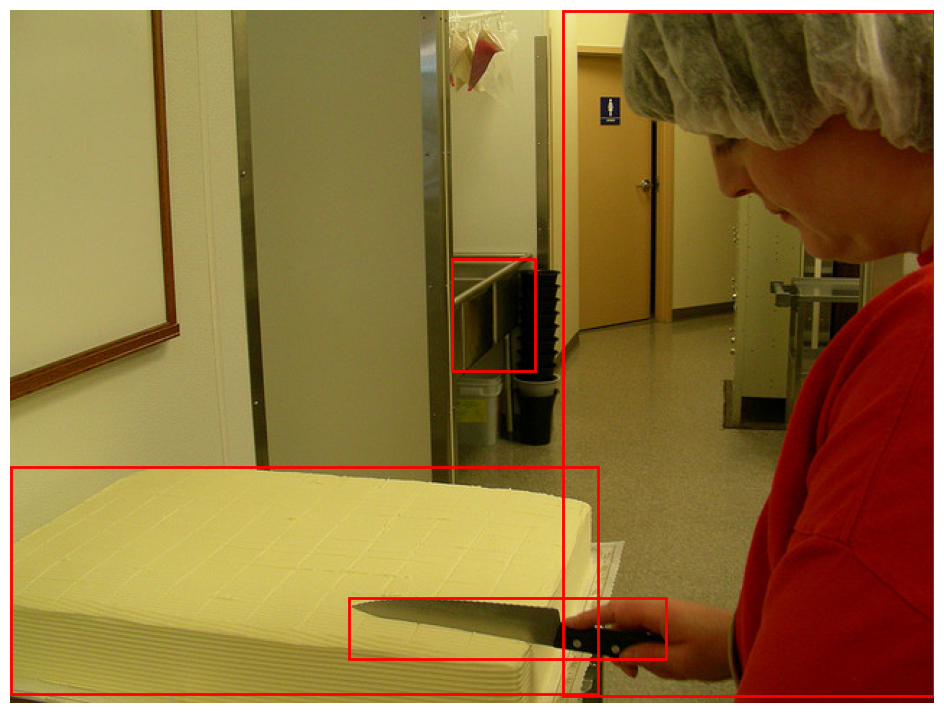

In [11]:
# Pick a random image and display its bounding boxes
img_ids = coco.getImgIds()
random_img_id = img_ids[0]  # Change index to view other images
img_info = coco.loadImgs(random_img_id)[0]
image_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

# Load image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get annotations for the image
ann_ids = coco.getAnnIds(imgIds=img_info['id'])
annotations = coco.loadAnns(ann_ids)

# Plot image with bounding boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Draw bounding boxes
for ann in annotations:
    bbox = ann['bbox']  # (x, y, width, height)
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.axis("off")
plt.show()


In [12]:
# Select a random image
random_img_id = img_ids[0]  # Change index for different images
img_info = coco.loadImgs(random_img_id)[0]

# Print metadata
print("🔹 Image Metadata 🔹")
print(f"ID: {img_info['id']}")
print(f"File Name: {img_info['file_name']}")
print(f"Width: {img_info['width']}")
print(f"Height: {img_info['height']}")


🔹 Image Metadata 🔹
ID: 522418
File Name: 000000522418.jpg
Width: 640
Height: 480


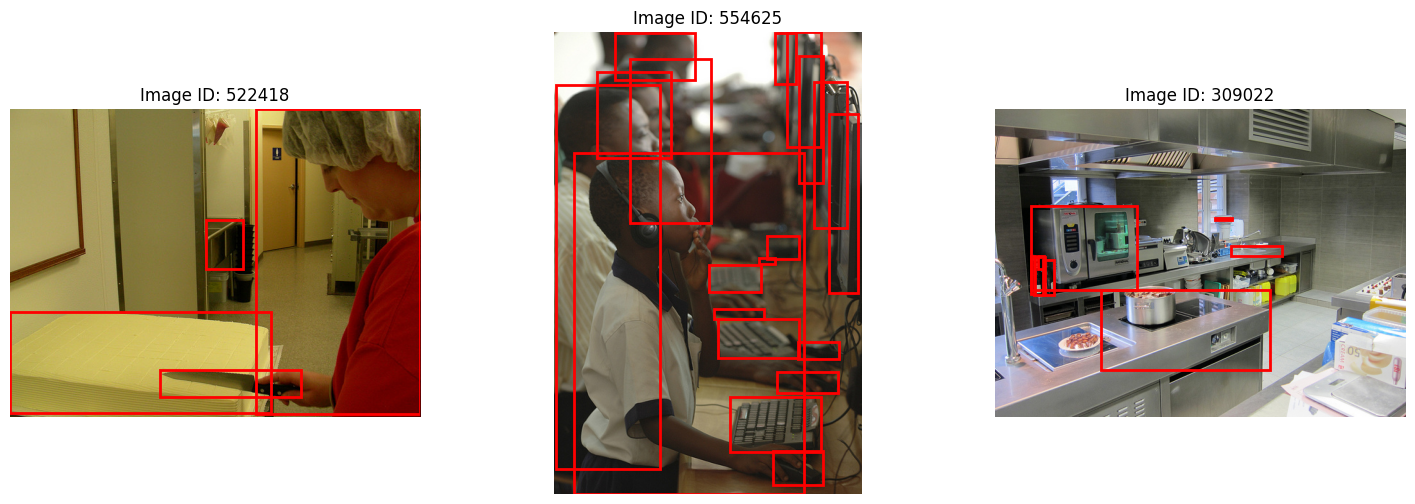

In [13]:
# Select multiple random images to display
num_images = 3  # Adjust number of images to display
fig, axes = plt.subplots(1, num_images, figsize=(18, 6))

for i, ax in enumerate(axes):
    random_img_id = img_ids[i]  # Select an image
    img_info = coco.loadImgs(random_img_id)[0]
    image_path = os.path.join(IMAGE_FOLDER, img_info['file_name'])

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get annotations for the image
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    annotations = coco.loadAnns(ann_ids)

    # Display image
    ax.imshow(image)

    # Draw bounding boxes
    for ann in annotations:
        bbox = ann['bbox']  # (x, y, width, height)
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.axis("off")  # Hide axis
    ax.set_title(f"Image ID: {img_info['id']}")

plt.show()


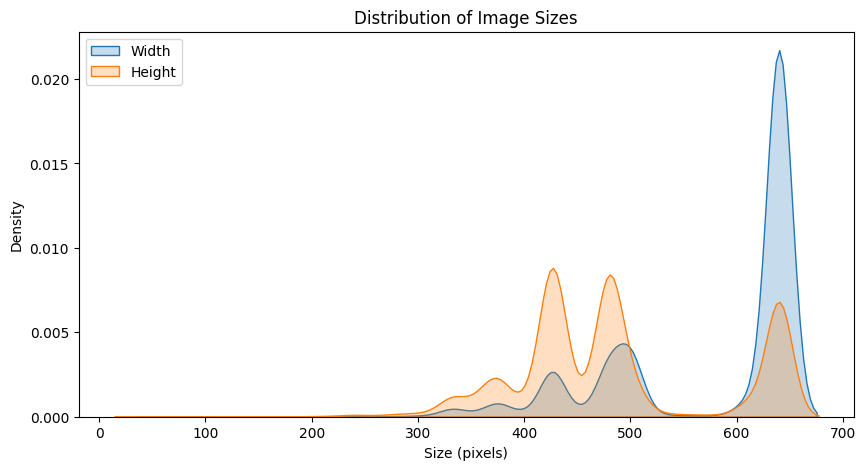

In [14]:
import seaborn as sns
import pandas as pd

# Extract image sizes
image_sizes = [(img['width'], img['height']) for img in data['images']]
df_image_sizes = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

# Plot distribution of image sizes
plt.figure(figsize=(10, 5))
sns.kdeplot(df_image_sizes['Width'], label='Width', fill=True)
sns.kdeplot(df_image_sizes['Height'], label='Height', fill=True)
plt.xlabel("Size (pixels)")
plt.ylabel("Density")
plt.title("Distribution of Image Sizes")
plt.legend()
plt.show()


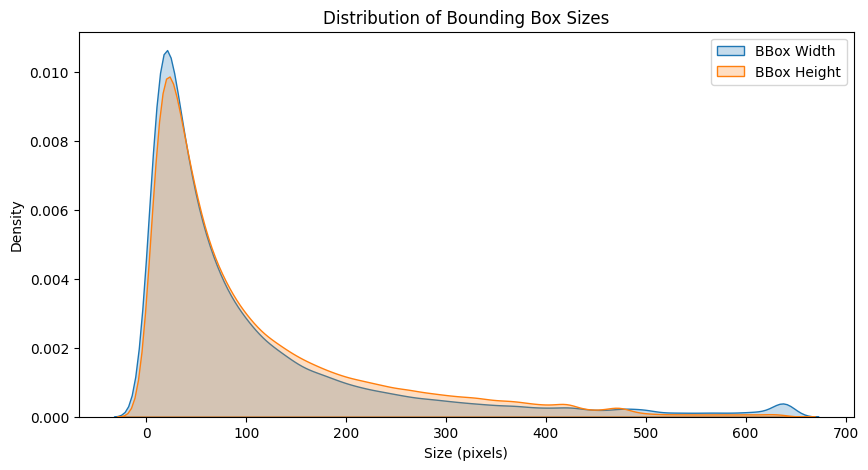

In [15]:
# Extract bounding box sizes (width, height)
bbox_sizes = [(ann['bbox'][2], ann['bbox'][3]) for ann in data['annotations']]
df_bbox_sizes = pd.DataFrame(bbox_sizes, columns=['BBox Width', 'BBox Height'])

# Plot distribution of bounding box sizes
plt.figure(figsize=(10, 5))
sns.kdeplot(df_bbox_sizes['BBox Width'], label='BBox Width', fill=True)
sns.kdeplot(df_bbox_sizes['BBox Height'], label='BBox Height', fill=True)
plt.xlabel("Size (pixels)")
plt.ylabel("Density")
plt.title("Distribution of Bounding Box Sizes")
plt.legend()
plt.show()


In [16]:
# Check for missing image IDs in annotations
image_ids = {img['id'] for img in data['images']}
annotation_img_ids = {ann['image_id'] for ann in data['annotations']}
missing_img_ids = image_ids - annotation_img_ids

print(f"Total Images: {len(image_ids)}")
print(f"Total Annotations: {len(annotation_img_ids)}")
print(f"Missing Image Annotations: {len(missing_img_ids)}")


Total Images: 29571
Total Annotations: 29315
Missing Image Annotations: 256


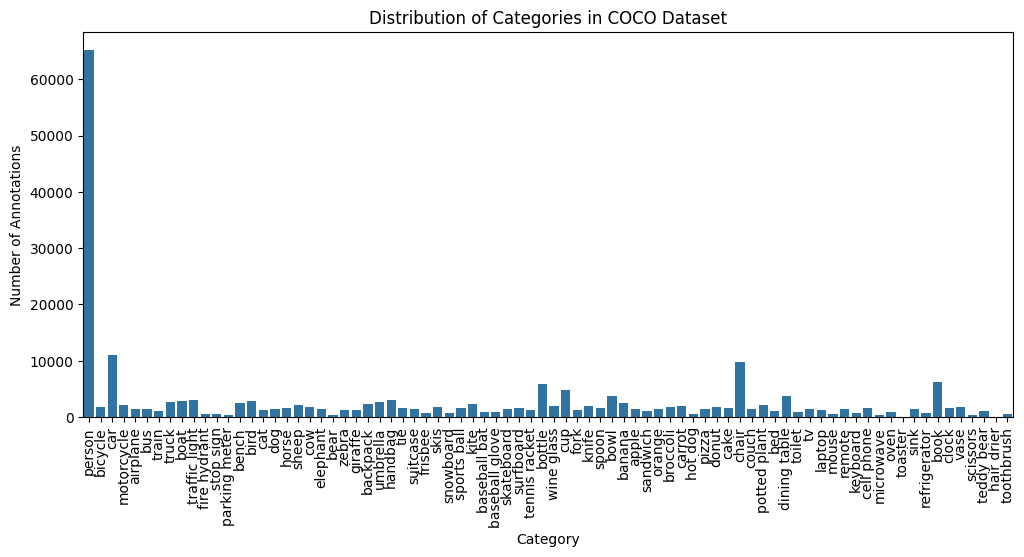

In [17]:
# Count number of annotations per category
category_counts = {cat['name']: 0 for cat in data['categories']}

for ann in data['annotations']:
    category_id = ann['category_id']
    category_name = next(cat['name'] for cat in data['categories'] if cat['id'] == category_id)
    category_counts[category_name] += 1

# Plot bar graph
plt.figure(figsize=(12, 5))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Annotations")
plt.title("Distribution of Categories in COCO Dataset")
plt.show()


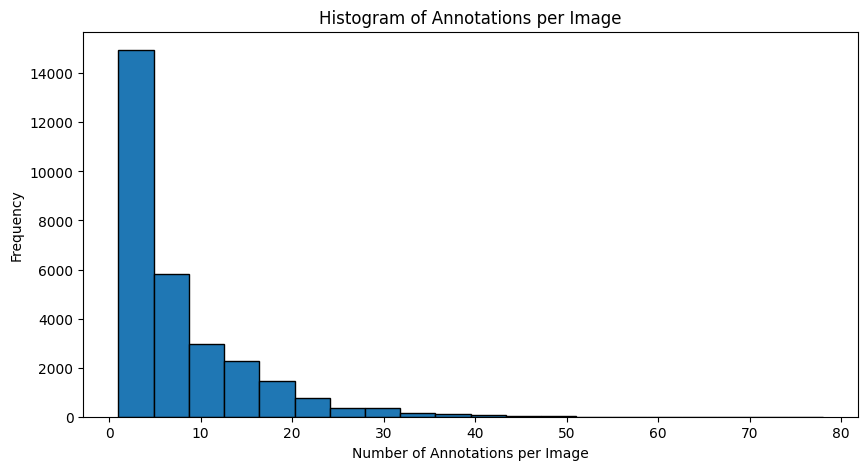

In [18]:
# Count number of annotations per image
annotations_per_image = {}
for ann in data['annotations']:
    img_id = ann['image_id']
    annotations_per_image[img_id] = annotations_per_image.get(img_id, 0) + 1

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(annotations_per_image.values(), bins=20, edgecolor='black')
plt.xlabel("Number of Annotations per Image")
plt.ylabel("Frequency")
plt.title("Histogram of Annotations per Image")
plt.show()


In [19]:
# Create a DataFrame for image metadata
df_metadata = pd.DataFrame(data['images'])

# Display the first 10 rows
df_metadata.head(10)


,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,4,000000522418.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
1,3,000000554625.jpg,http://images.cocodataset.org/train2017/000000...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625
2,2,000000309022.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-14 17:28:23,http://farm4.staticflickr.com/3790/10167396295...,309022
3,1,000000193271.jpg,http://images.cocodataset.org/train2017/000000...,320,480,2013-11-14 17:55:04,http://farm4.staticflickr.com/3772/9523928163_...,193271
4,3,000000224736.jpg,http://images.cocodataset.org/train2017/000000...,427,640,2013-11-14 18:20:45,http://farm3.staticflickr.com/2727/4397992076_...,224736
5,3,000000223648.jpg,http://images.cocodataset.org/train2017/000000...,640,480,2013-11-14 21:06:15,http://farm6.staticflickr.com/5219/5383892439_...,223648
6,3,000000113588.jpg,http://images.cocodataset.org/train2017/000000...,640,425,2013-11-14 21:36:59,http://farm5.staticflickr.com/4103/5094762826_...,113588
7,3,000000384553.jpg,http://images.cocodataset.org/train2017/000000...,425,640,2013-11-14 21:45:37,http://farm5.staticflickr.com/4006/4581234593_...,384553
8,2,000000368402.jpg,http://images.cocodataset.org/train2017/000000...,427,640,2013-11-14 22:22:42,http://farm8.staticflickr.com/7234/6912194164_...,368402
9,4,000000542145.jpg,http://images.cocodataset.org/train2017/000000...,500,375,2013-11-14 23:55:14,http://farm4.staticflickr.com/3549/3450899546_...,542145
